In [27]:
from py2neo import Graph
import matplotlib.pyplot as plt
from tabulate import tabulate

In [1]:
graph = Graph(
    "bolt://localhost:7687",
    auth=("neo4j", "admin"),
    # name="neo4j-2",
)

NameError: name 'Graph' is not defined

In [3]:
def plot_distribution(data):
    plt.bar(data.keys(), data.values())

def plot_ratings_distribution():
    results = graph.run("""
        match (u:User)-[r:RATES]-(m:Movie)
        return r.rating as rating, count(r) as count order by r.rating
    """).data()
    ratings_dict = { rat["rating"]: rat["count"] for rat in results }
    plot_distribution(ratings_dict)

def plot_ratings_per_user_distribution():
    results = graph.run("""
        MATCH (u:User)-[r:RATES]-(m)
        with u, count(r) as counter
        return u.username as username, counter order by counter desc;
    """).data()
    ratings_dict = { rat["username"]: rat["counter"] for rat in results }
    plot_distribution(ratings_dict)

def plot_ratings_per_movie_distribution():
    results = graph.run("""
        MATCH (u:User)-[r:RATES]-(m)
        WITH m, count(r) as counter
        RETURN m.id as id, counter order by counter desc;
    """).data()
    ratings_dict = { rat["id"]: rat["counter"] for rat in results }
    plot_distribution(ratings_dict)

def count_graph():
    movies = graph.run("match (m:Movie) return count(m)").evaluate()
    users = graph.run("match (u:User) return count(u)").evaluate()
    ratings = graph.run("match (u:User)-[r:RATES]-(m:Movie) return count(r)").evaluate()
    average_ratings_per_user = graph.run("""
        MATCH (u:User)
        WITH u, size((u)-[:RATES]-()) as rateCount
        RETURN avg(rateCount) as averageRateCount
    """).evaluate()
    average_ratings_per_movie = graph.run("""
        MATCH (m:Movie)
        WITH m, size((m)-[:RATES]-()) as rateCount
        RETURN avg(rateCount) as averageRateCount
    """).evaluate()
    print(tabulate([[
        movies,
        users,
        ratings,
        average_ratings_per_movie,
        average_ratings_per_user
    ]], headers=["Movies", "Users", "Ratings", "Average ratings per movie", "Average ratings per user"]))

def get_graph_statistics():
    plot_ratings_distribution()
    count_graph()

In [2]:
get_graph_statistics()

NameError: name 'get_graph_statistics' is not defined

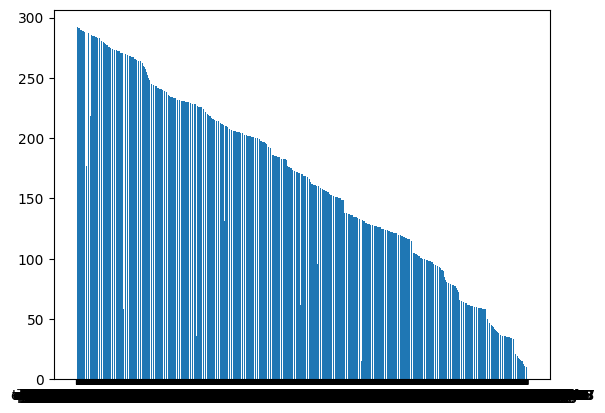

In [39]:
plot_ratings_per_user_distribution()

### Keep only the 9230 users with more than 150 ratings

In [41]:
graph.run("""
    MATCH (u:User)-[r:RATES]-(m:Movie)
    with u, count(r) as counter
    where counter<150
    detach delete u
""")

(No data)

In [76]:
# delete unrated movies
def delete_unrated_movies():
    graph.run("""
    match (m:Movie) where not (:User)-[:RATES]-(m) detach delete (m);
    """)
delete_unrated_movies()

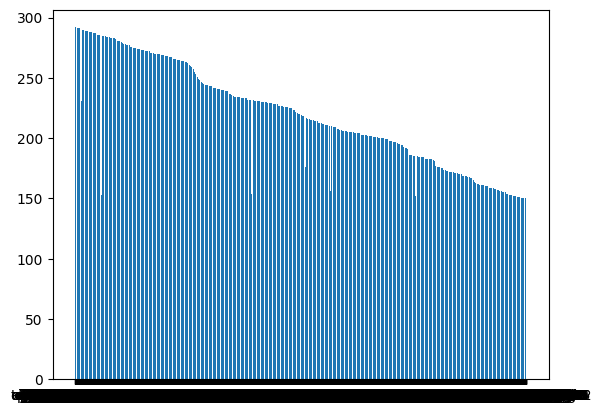

In [42]:
plot_ratings_per_user_distribution()

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    2056349                       118.83                     220.331


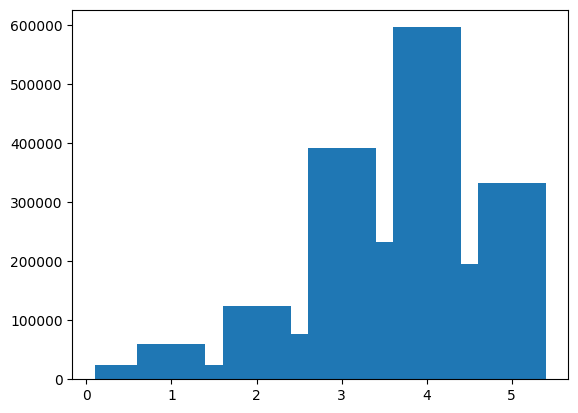

In [45]:
get_graph_statistics()

#### Start deleting random ratings with 3 <= r.rating <= 5 to balance the dataset

In [47]:
def delete_random_ratings(rating: int, lim=100):
    graph.run(f"""
        match (u:User)-[r:RATES {{ rating: {rating} }}]-(m:Movie)
        with r, rand() as rand order by rand limit {lim}
        detach delete r;
    """)

In [49]:
delete_random_ratings(rating=4, lim=1000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    2055249                      118.766                     220.213


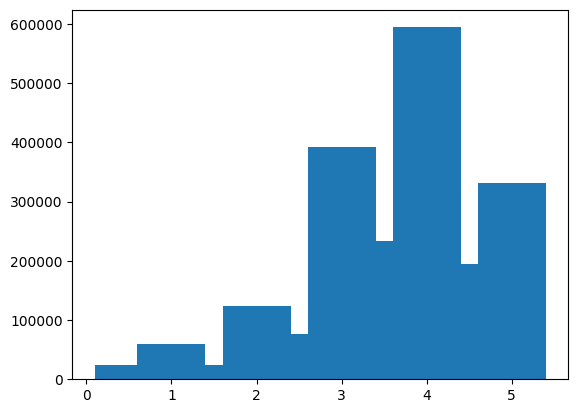

In [50]:
get_graph_statistics()

In [ ]:
delete_random_ratings(rating=4, lim=7000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    2048249                      118.362                     219.463


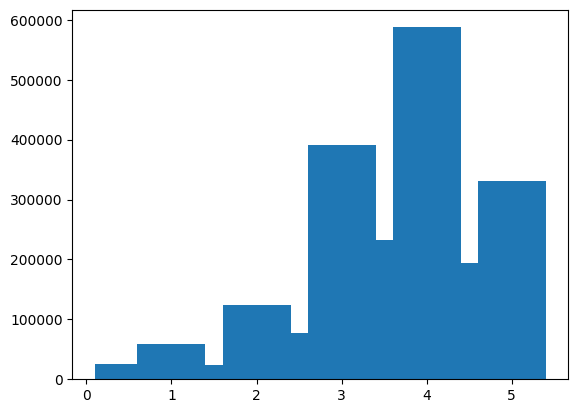

In [51]:
get_graph_statistics()

In [ ]:
delete_random_ratings(rating=4, lim=50000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    1998249                      115.472                     214.106


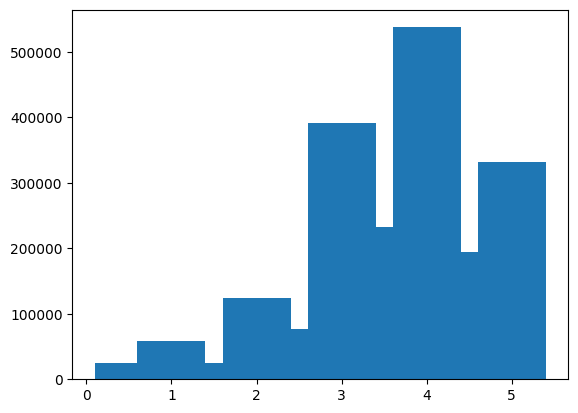

In [52]:
get_graph_statistics()

In [53]:
delete_random_ratings(rating=4, lim=50000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    1948249                      112.583                     208.748


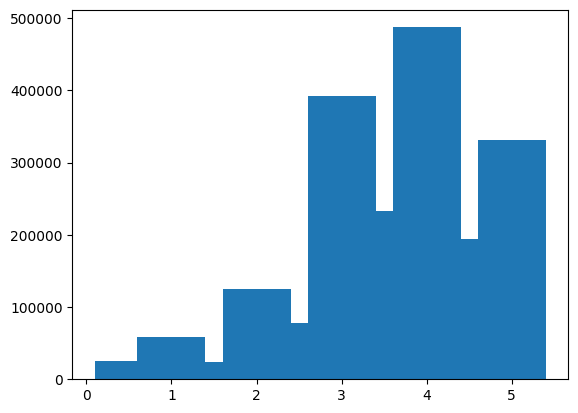

In [54]:
get_graph_statistics()

In [55]:
delete_random_ratings(rating=4, lim=100000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    1848249                      106.804                     198.034


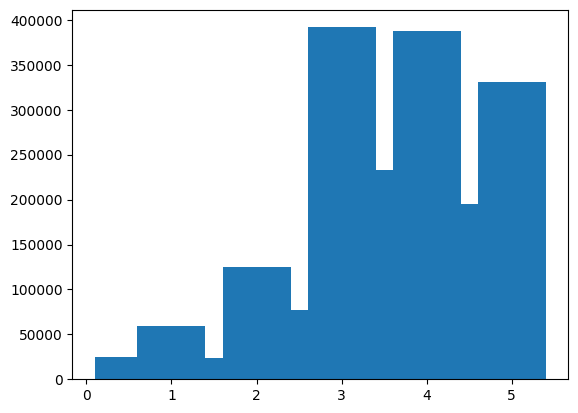

In [56]:
get_graph_statistics()

In [57]:
delete_random_ratings(rating=3, lim=50000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    1798249                      103.915                     192.676


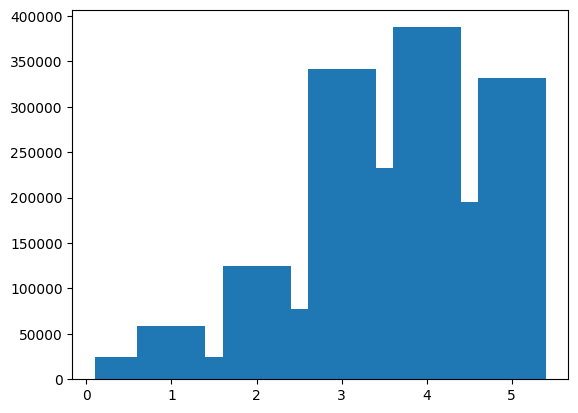

In [58]:
get_graph_statistics()

In [59]:
delete_random_ratings(rating=4, lim=100000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    1698249                      98.1363                     181.962


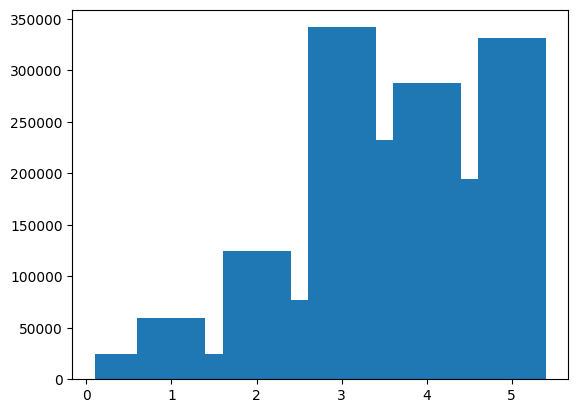

In [60]:
get_graph_statistics()

In [61]:
delete_random_ratings(rating=3, lim=100000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    1598249                      92.3576                     171.247


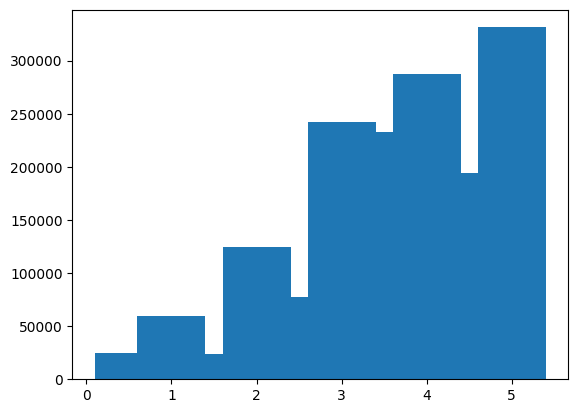

In [62]:
get_graph_statistics()

In [63]:
delete_random_ratings(rating=5, lim=100000)

In [64]:
delete_random_ratings(rating=4, lim=100000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    1398249                      80.8003                     149.818


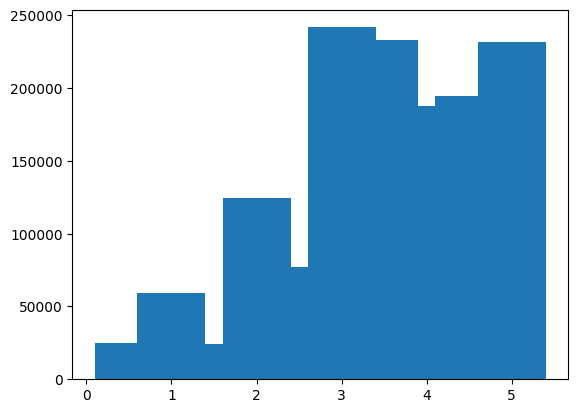

In [65]:
get_graph_statistics()

In [66]:
delete_random_ratings(rating=3, lim=100000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    1298249                      75.0216                     139.103


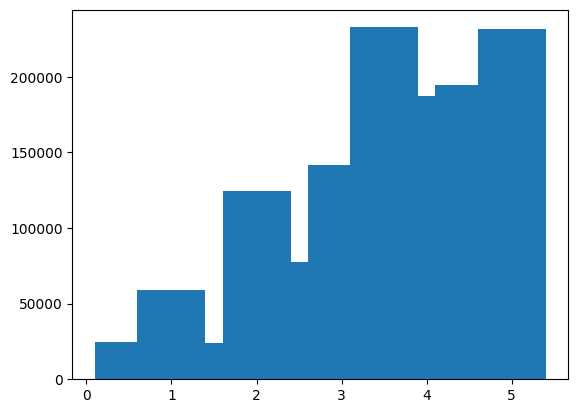

In [67]:
get_graph_statistics()

In [68]:
delete_random_ratings(rating=5, lim=100000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    1198249                      69.2429                     128.388


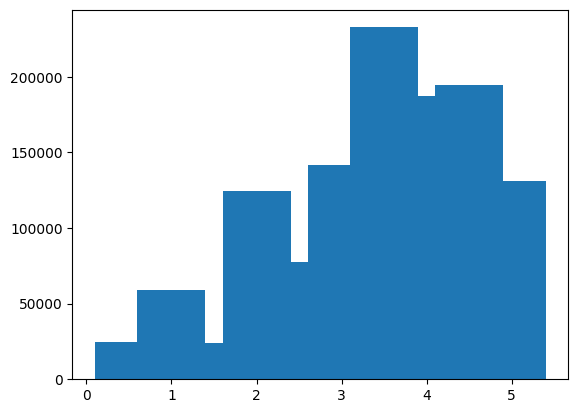

In [69]:
get_graph_statistics()

In [70]:
delete_random_ratings(rating=4, lim=100000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333    1098249                      63.4643                     117.674


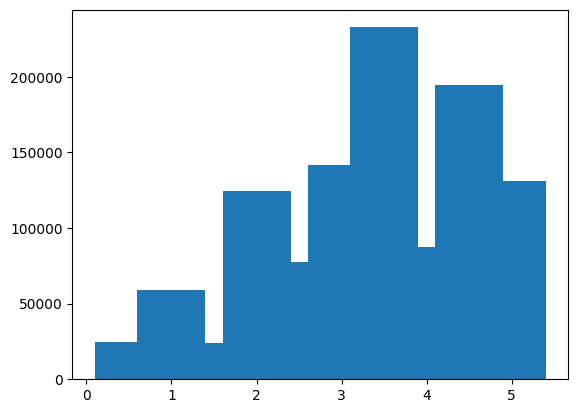

In [71]:
get_graph_statistics()

In [72]:
delete_random_ratings(rating=3.5, lim=100000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333     998249                      57.6856                     106.959


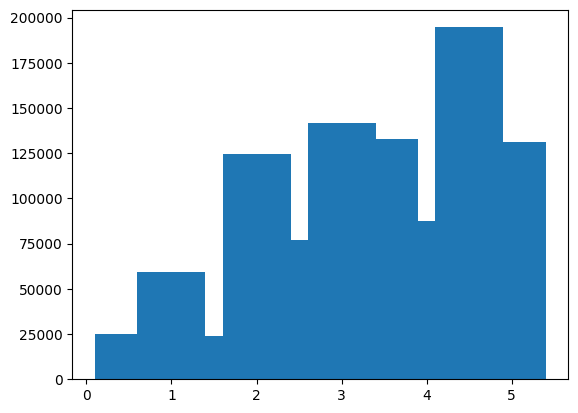

In [73]:
get_graph_statistics()

In [74]:
delete_random_ratings(rating=4.5, lim=100000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   17305     9333     898249                      51.9069                     96.2444


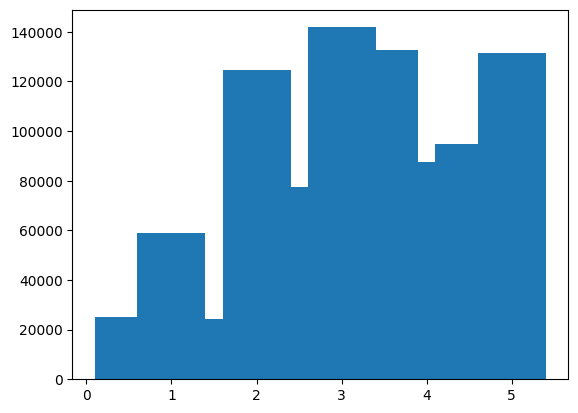

In [75]:
get_graph_statistics()

In [77]:
delete_unrated_movies()

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
   14549     9333     898249                      61.7396                     96.2444


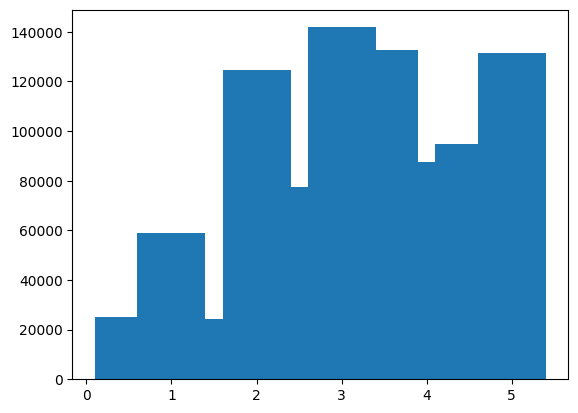

In [78]:
get_graph_statistics()

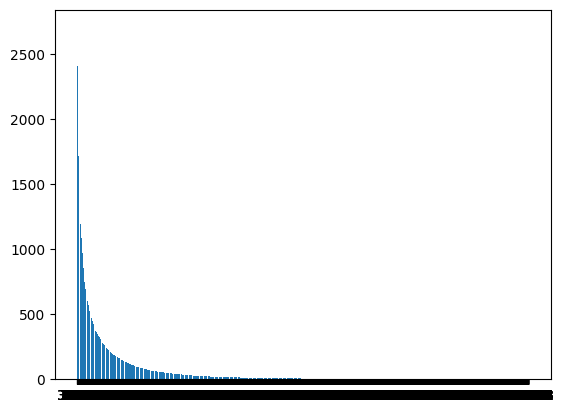

In [80]:
plot_ratings_per_movie_distribution()

#### Delete movies with less than 30 ratings

In [84]:
graph.run("""
    match (u:User)-[r:RATES]-(m:Movie)
    with m, count(r) as counter
    where counter < 30
    detach delete m
""")

(No data)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     835154                      225.413                      89.484


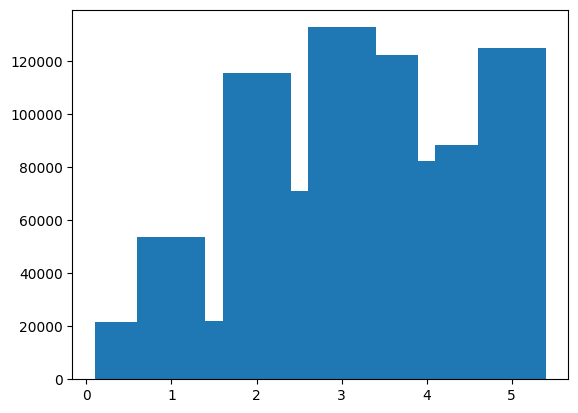

In [85]:
get_graph_statistics()

In [86]:
delete_random_ratings(rating=3, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     825154                      222.714                     88.4125


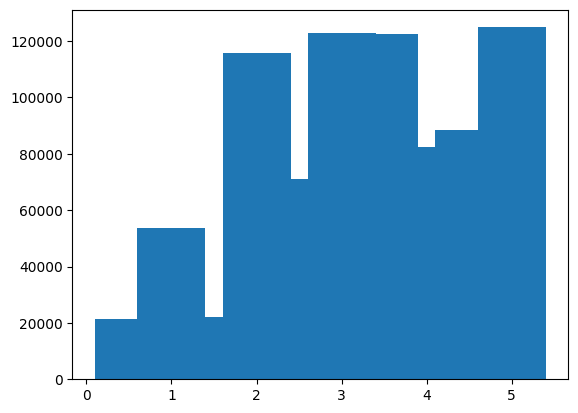

In [87]:
get_graph_statistics()

In [88]:
delete_random_ratings(rating=2, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     805154                      217.316                     86.2696


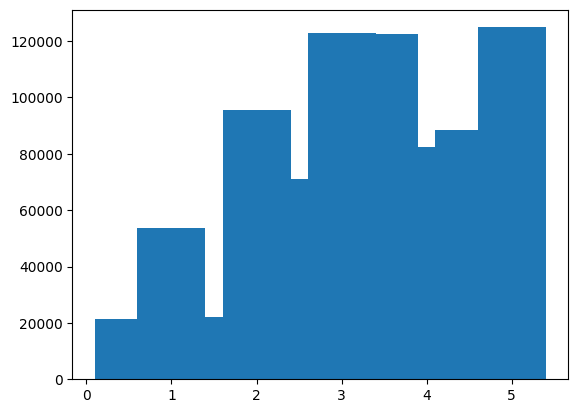

In [89]:
get_graph_statistics()

In [90]:
delete_unrated_movies()

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     805154                      217.316                     86.2696


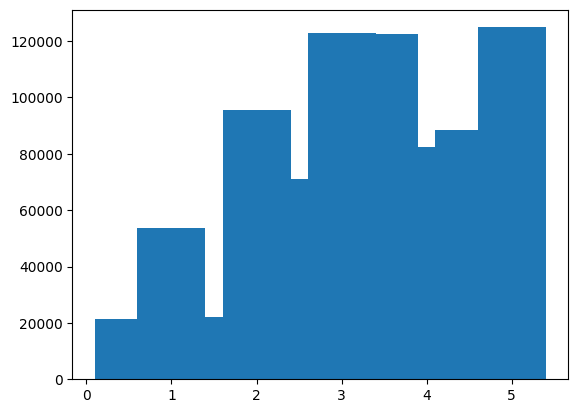

In [91]:
get_graph_statistics()

In [92]:
delete_random_ratings(rating=3, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     785154                      211.917                     84.1266


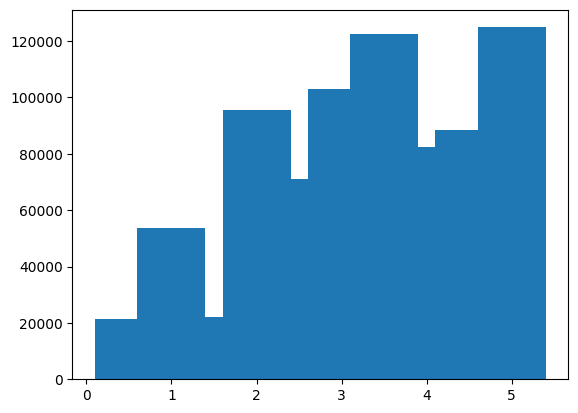

In [93]:
get_graph_statistics()

In [94]:
delete_random_ratings(rating=3.5, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     765154                      206.519                     81.9837


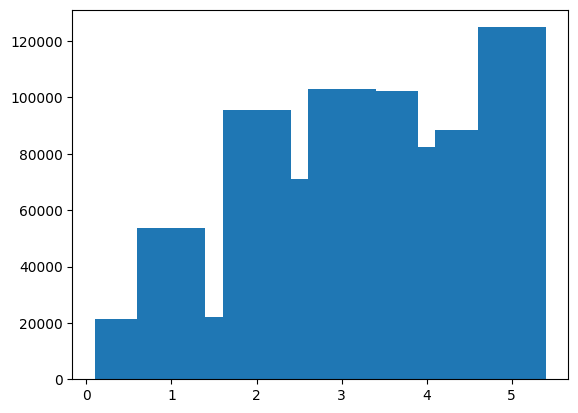

In [95]:
get_graph_statistics()

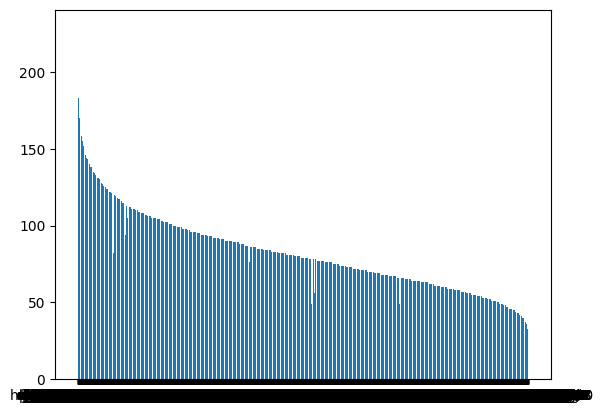

In [96]:
plot_ratings_per_user_distribution()

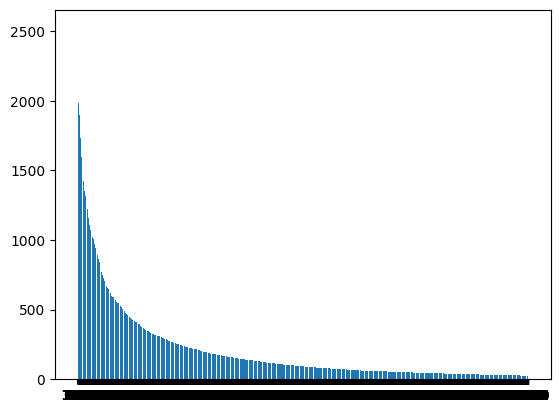

In [97]:
plot_ratings_per_movie_distribution()

In [98]:
delete_random_ratings(rating=5, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     755154                       203.82                     80.9122


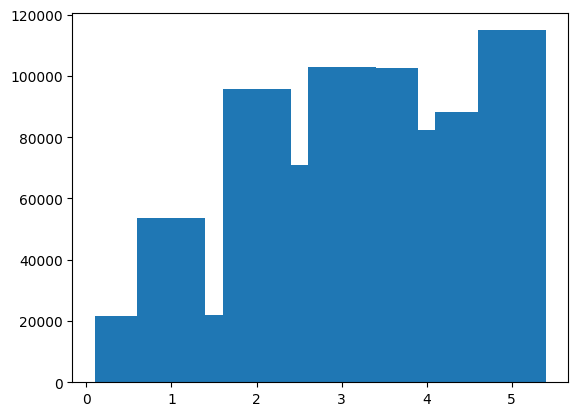

In [99]:
get_graph_statistics()

In [100]:
delete_random_ratings(rating=5, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     735154                      198.422                     78.7693


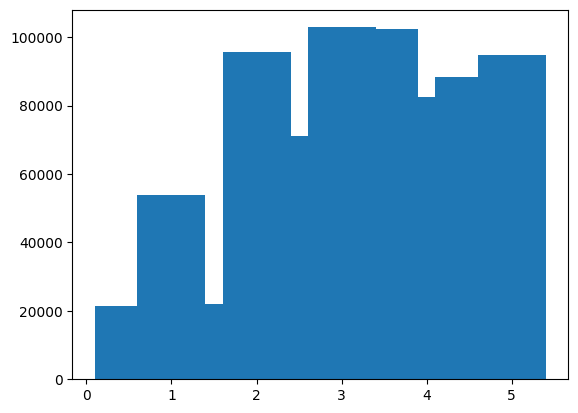

In [101]:
get_graph_statistics()

In [102]:
delete_random_ratings(rating=3.5, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     715154                      193.024                     76.6264


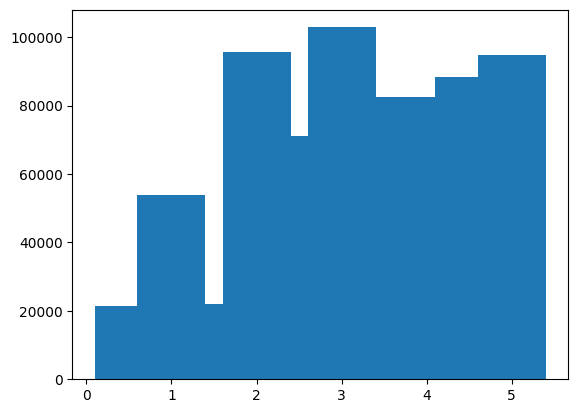

In [103]:
get_graph_statistics()

In [104]:
delete_random_ratings(rating=3, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     695154                      187.626                     74.4834


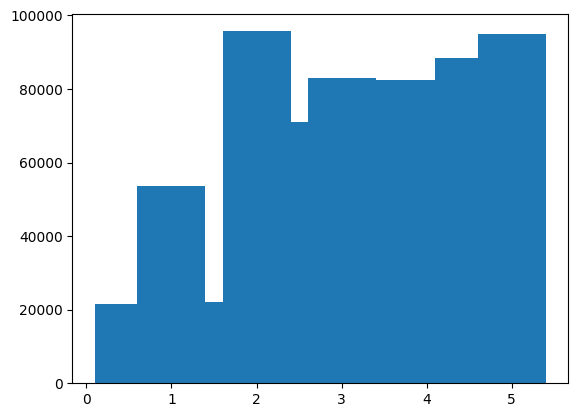

In [105]:
get_graph_statistics()

In [106]:
delete_random_ratings(rating=2, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     675154                      182.228                     72.3405


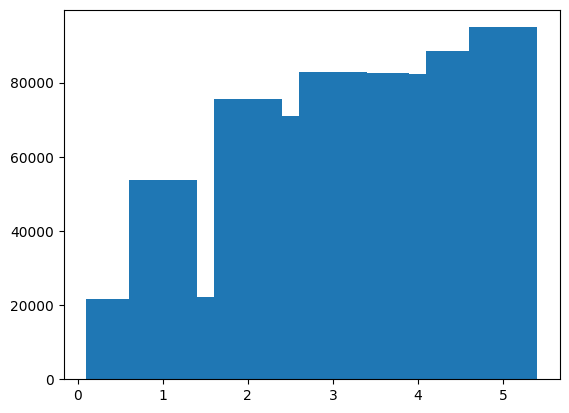

In [107]:
get_graph_statistics()

In [108]:
delete_random_ratings(rating=4.5, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     665154                      179.529                      71.269


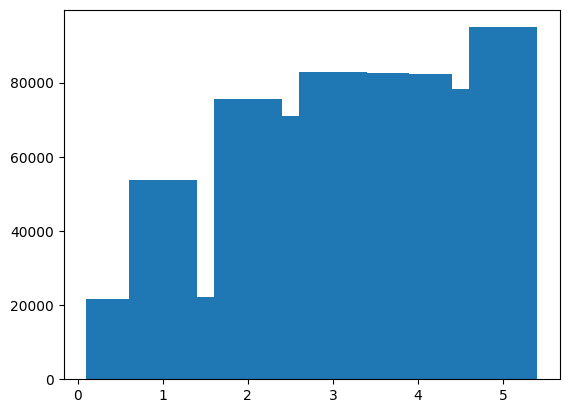

In [109]:
get_graph_statistics()

In [110]:
delete_random_ratings(rating=5, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     645154                      174.131                     69.1261


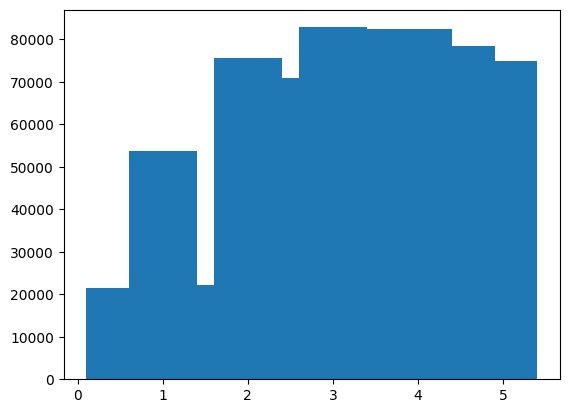

In [111]:
get_graph_statistics()

In [112]:
delete_random_ratings(rating=3, lim=10000)

In [113]:
delete_random_ratings(rating=4, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     625154                      168.733                     66.9832


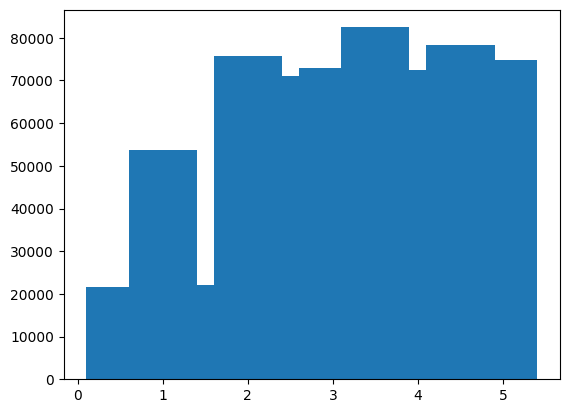

In [114]:
get_graph_statistics()

In [115]:
delete_random_ratings(rating=3.5, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     615154                      166.033                     65.9117


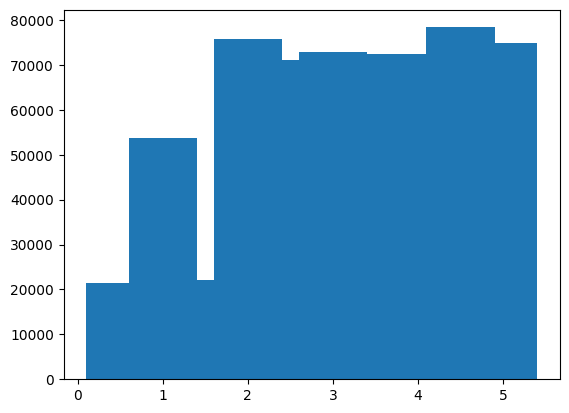

In [116]:
get_graph_statistics()

In [117]:
delete_random_ratings(rating=2, lim=10000)

In [118]:
delete_random_ratings(rating=3, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     595154                      160.635                     63.7688


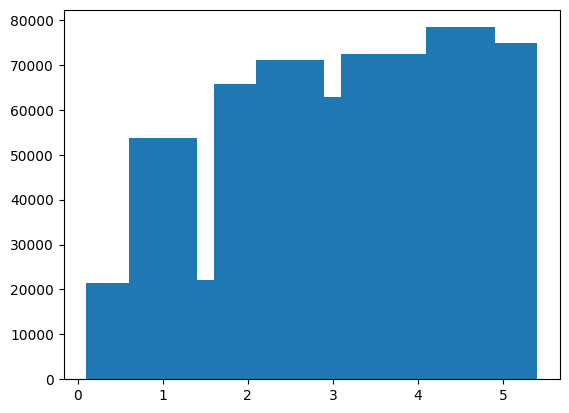

In [119]:
get_graph_statistics()

In [120]:
delete_random_ratings(rating=4.5, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     585154                      157.936                     62.6973


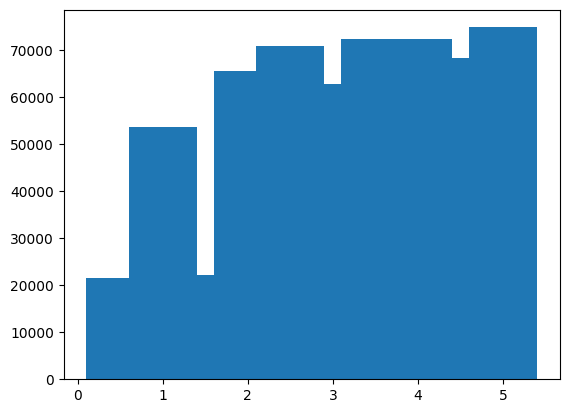

In [121]:
get_graph_statistics()

In [122]:
delete_random_ratings(rating=5, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     575154                      155.237                     61.6258


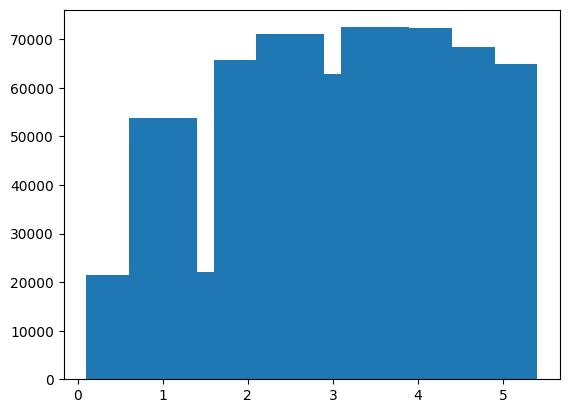

In [123]:
get_graph_statistics()

In [124]:
delete_random_ratings(rating=2.5, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     565154                      152.538                     60.5544


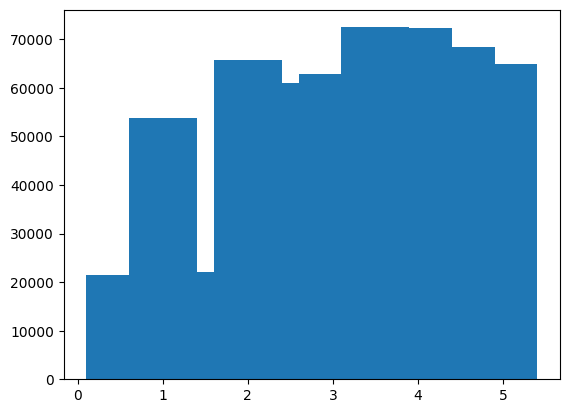

In [125]:
get_graph_statistics()

#### Delete unconnected nodes (genres, production companies, users, etc)

In [128]:
graph.run(
    """
    match (m) where not (m)-[]-() detach delete m;
    """
)

(No data)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     565154                      152.538                     60.5544


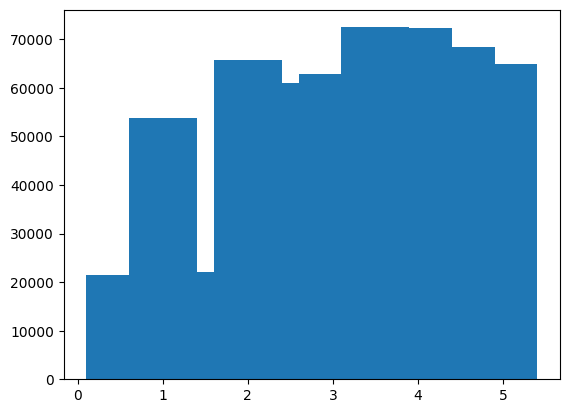

In [129]:
get_graph_statistics()